In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [3]:
df.shape

(42000, 785)

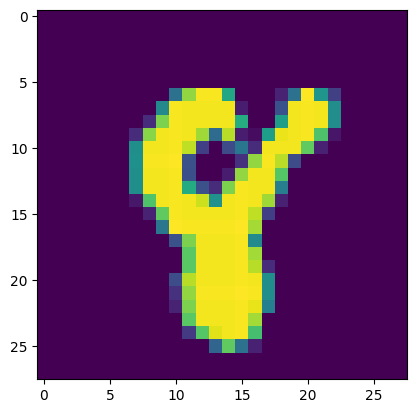

In [4]:
plt.imshow(df.iloc[11102,1:].values.reshape(28,28))

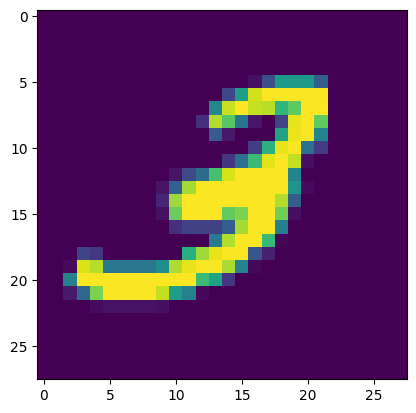

In [5]:
plt.imshow(df.iloc[40505,1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(33600, 784)

In [9]:
X_test.shape

(8400, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
import time
start = time.time()
y_pred = knn.predict(X_test.values)
print(time.time() - start)

C:\Users\shlok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


11.759992361068726


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [17]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [18]:
X_train_trf.shape

(33600, 200)

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [21]:
y_pred_trf = knn.predict(X_test_trf)

In [22]:
accuracy_score(y_test, y_pred_trf)

0.9508333333333333

In [23]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred_trf = knn.predict(X_test_trf)
    print(f"Accuracy for {i} components is {accuracy_score(y_test, y_pred_trf)}")
    
    if accuracy_score(y_test, y_pred_trf) > 0.9541:
        break

Accuracy for 1 components is 0.2592857142857143
Accuracy for 2 components is 0.32345238095238094
Accuracy for 3 components is 0.5101190476190476
Accuracy for 4 components is 0.6661904761904762
Accuracy for 5 components is 0.7378571428571429
Accuracy for 6 components is 0.8226190476190476
Accuracy for 7 components is 0.8435714285714285
Accuracy for 8 components is 0.871547619047619
Accuracy for 9 components is 0.886547619047619
Accuracy for 10 components is 0.9052380952380953
Accuracy for 11 components is 0.910952380952381
Accuracy for 12 components is 0.919047619047619
Accuracy for 13 components is 0.9297619047619048
Accuracy for 14 components is 0.9348809523809524
Accuracy for 15 components is 0.9385714285714286
Accuracy for 16 components is 0.9388095238095238
Accuracy for 17 components is 0.9414285714285714
Accuracy for 18 components is 0.9408333333333333
Accuracy for 19 components is 0.9421428571428572
Accuracy for 20 components is 0.9438095238095238
Accuracy for 21 components is 0.

In [ ]:
# Converting into 2D
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

array([[-2.71864964, -0.4897933 ],
       [-0.67694318, -6.75395872],
       [-3.03318925,  6.50952028],
       ...,
       [ 2.14880723,  0.78125843],
       [ 1.05951122,  0.94798703],
       [17.70255971,  1.9616807 ]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [ ]:
# Converting into 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

array([[-2.71862459, -0.48990037,  1.13623348],
       [-0.67696947, -6.75375004, -2.33643113],
       [-3.03323645,  6.50991599,  7.49151372],
       ...,
       [ 2.14886196,  0.78082785, -0.74784415],
       [ 1.05957634,  0.94768124,  3.95064284],
       [17.70260956,  1.96161347, -4.94318174]])

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [ ]:
# Eigen values
pca.explained_variance_

array([40.67111198, 29.17023398, 26.74459613])

In [ ]:
pca.components_.shape

(3, 784)

### To find optimum number of Principal components

In [ ]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
pca.components_.shape

(784, 784)

In [ ]:
cumsum_arr = np.cumsum(pca.explained_variance_ratio_)
cumsum_arr

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

In [ ]:
l=list(cumsum_arr)
# l.index(0.9001324775058175)

ValueError: 0.9001324775058175 is not in list

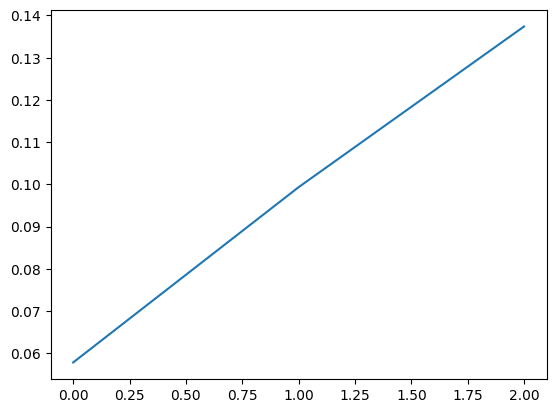

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Thus the optimum number of components is 223.

In [ ]:
f